# Data Visualisation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from matplotlib.lines import Line2D
from dir_paths import FIGURES_WORKLOADS_DIR, WORKLOADS_PKL_PATH

workloads_df = pd.read_pickle(WORKLOADS_PKL_PATH)

# Configure matplotlib to use LaTeX
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 12,
    "axes.labelsize": 12,
    "axes.titlesize": 14,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "figure.figsize": [10, 6],
    "savefig.dpi": 300,
    "savefig.format": "pdf"
})

alpha_values = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6]
n = 100

## Zipfian curves with varying alpha values (theoretical)

The code below plots Zipfian curves for different alpha values:

`alpha_values = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6]`

Zipfian curves with different y-axes


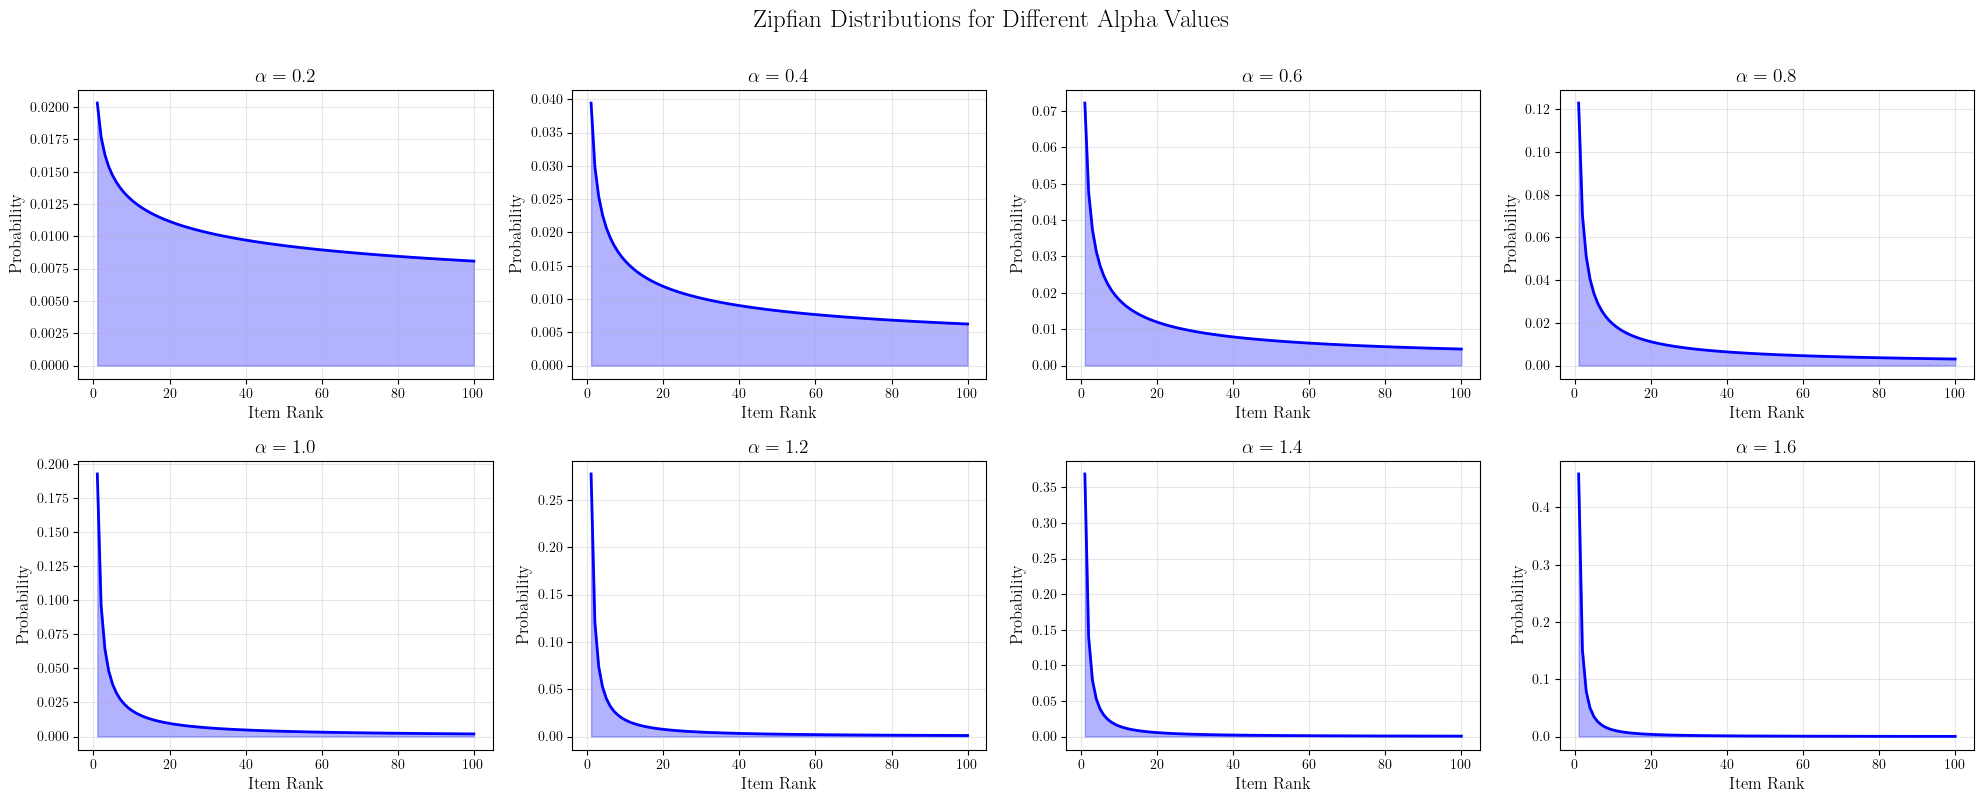

Zipfian curves with the same y-axes


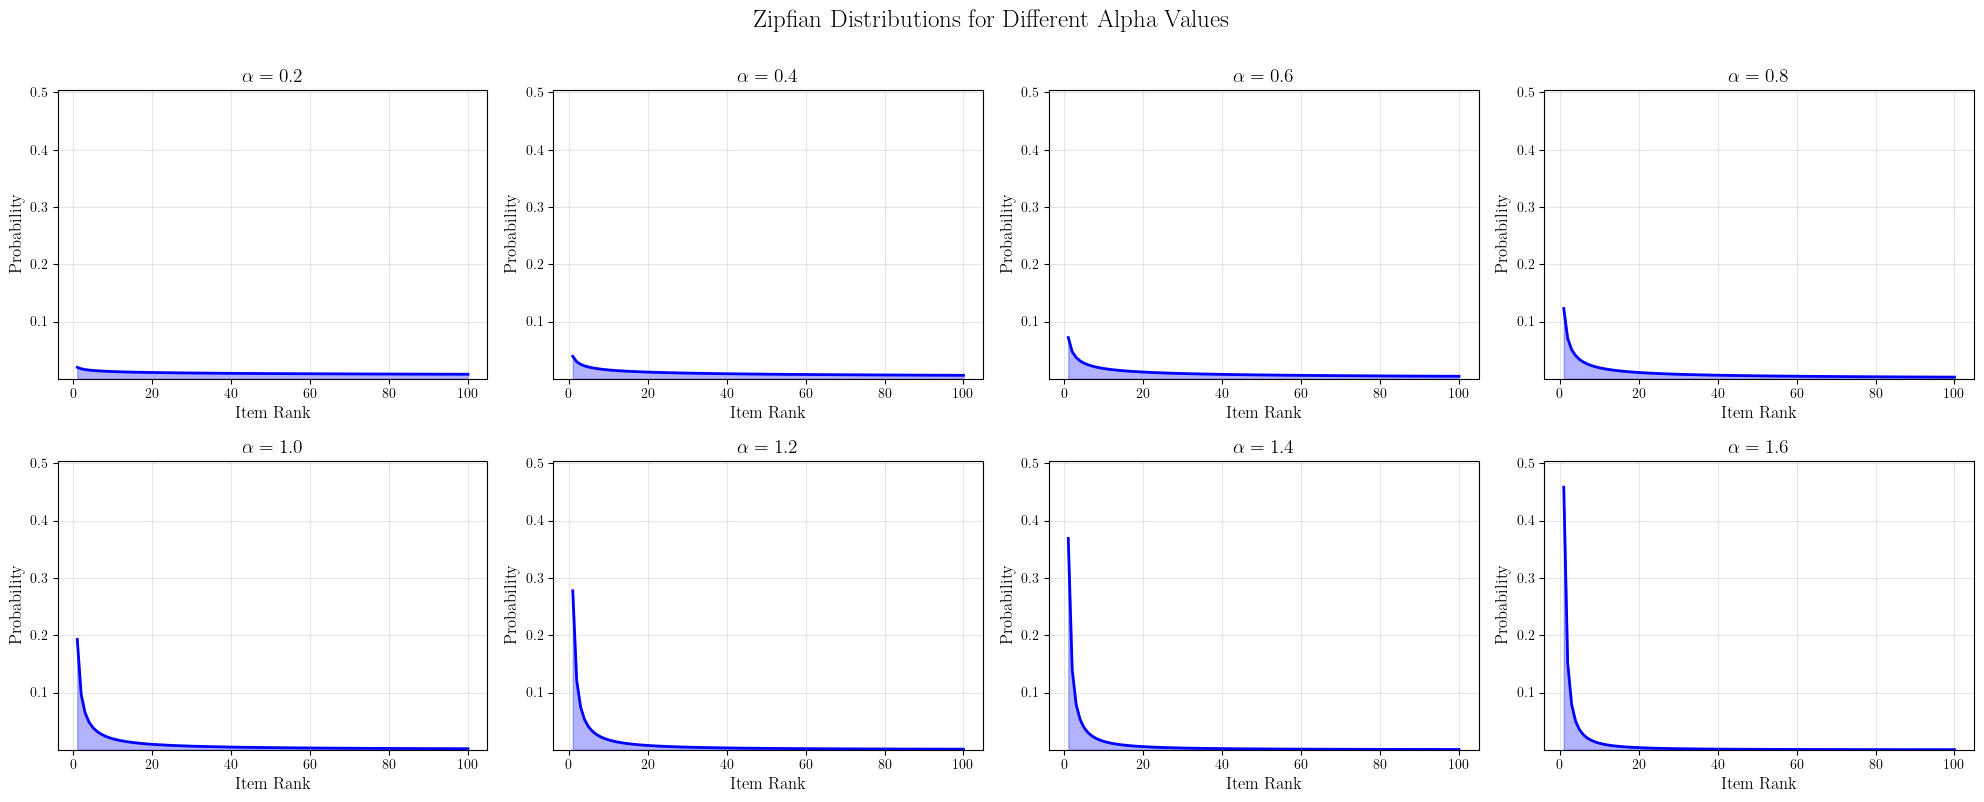

In [ ]:
def plot_separate_zipf_curves(n: int, alpha_values: list[float], global_y_axis: bool = False, save_fig: bool = False, title_on: bool = True) -> None:
    _, axes = plt.subplots(2, 4, figsize=(20, 8))
    axes = axes.flatten()

    all_pmfs = [] # pmf = probability mass function
    x = np.arange(1, n + 1)
    for alpha in alpha_values:
        pmf = x ** (-alpha)
        pmf /= pmf.sum()  # normalize to make it a probability distribution
        all_pmfs.append(pmf)

    # global min and max for y-axis, useful when global_y_axis is true
    y_min = min(np.min(pmf) for pmf in all_pmfs)
    y_max = max(np.max(pmf) for pmf in all_pmfs)

    if title_on:
        plt.suptitle("Zipfian Distributions for Different Alpha Values", fontsize=18, y=1)

    for idx, alpha in enumerate(alpha_values):
        pmf = all_pmfs[idx]
        
        axes[idx].plot(x, pmf, linewidth=2, color='blue')
        axes[idx].fill_between(x, pmf, alpha=0.3, color='blue')
        
        axes[idx].set_title(f"$\\alpha={alpha}$")
        axes[idx].set_xlabel("Item Rank")
        axes[idx].set_ylabel("Probability")
        axes[idx].grid(True, alpha=0.3)

        if (global_y_axis):
            axes[idx].set_ylim(y_min * 0.9, y_max * 1.1)

    plt.tight_layout()

    if (save_fig):
        os.makedirs(FIGURES_WORKLOADS_DIR, exist_ok=True)
        filename = f"zipfian_curves{'_global_y_axis' if global_y_axis else ''}{'_no_title' if not title_on else ''}.pdf"
        plt.savefig(os.path.join(FIGURES_WORKLOADS_DIR, filename), bbox_inches='tight')

    plt.show()


print("Zipfian curves with different y-axes")
plot_separate_zipf_curves(n, alpha_values, global_y_axis = False, save_fig = False, title_on=True)
print("Zipfian curves with the same y-axes")
plot_separate_zipf_curves(n, alpha_values, global_y_axis = True, save_fig = False, title_on=True)


Zipfian curves in one plot


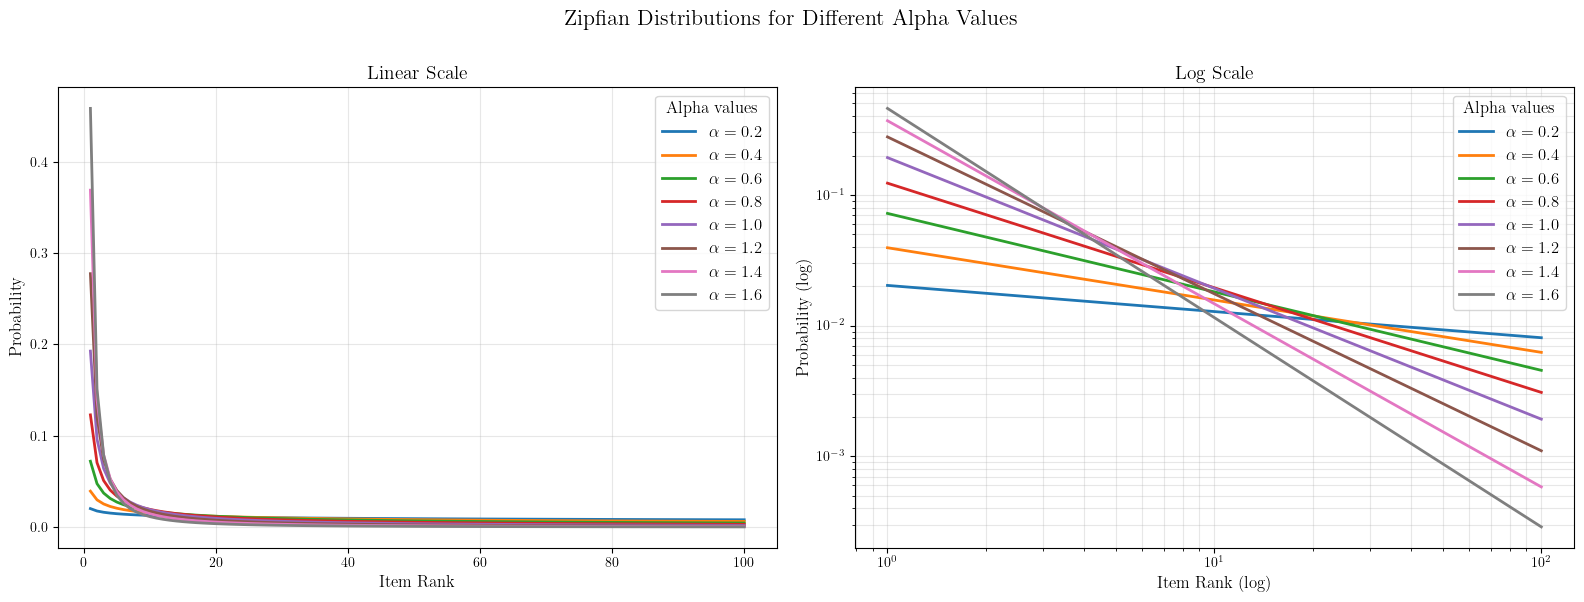

In [12]:
def plot_all_zipf_curves(n: int, alpha_values: list[float], scale: bool = False, save_fig: bool = False, show_title: bool = True) -> None:
    def plot_zipf_curves(ax, x, alpha_values, log_scale=False):
        for alpha in alpha_values:
            pmf = x ** (-alpha)
            pmf /= pmf.sum()
            ax.plot(x, pmf, linewidth=2, label=f"$\\alpha={alpha}$")
        ax.set_xlabel(f"Item Rank{' (log)' if log_scale else ''}")
        ax.set_ylabel(f"Probability{' (log)' if log_scale else ''}")
        ax.grid(True, alpha=0.3, which='both')
        ax.legend(title="Alpha values", fontsize=12)
        if log_scale:
            ax.set_xscale('log')
            ax.set_yscale('log')
    
    x = np.arange(1, n + 1)

    if scale == "both":
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        plot_zipf_curves(axes[0], x, alpha_values, log_scale=False)
        if show_title: fig.suptitle("Zipfian Distributions for Different Alpha Values", fontsize=16, y=1)
        axes[0].set_title("Linear Scale")
        plot_zipf_curves(axes[1], x, alpha_values, log_scale=True)
        axes[1].set_title("Log Scale")
        plt.tight_layout()
        if save_fig:
            os.makedirs(FIGURES_WORKLOADS_DIR, exist_ok=True)
            filename = f"zipfian_curves_all_both{'_no_title' if not show_title else ''}.pdf"
            plt.savefig(os.path.join(FIGURES_WORKLOADS_DIR, filename), bbox_inches='tight')
        plt.show()

    else:
        fig, ax = plt.subplots(figsize=(10, 6))
        plot_zipf_curves(ax, x, alpha_values, log_scale=(scale == "log"))
        if show_title: ax.set_title(f"Zipfian Distributions for Different Alpha Values{' (log)' if scale == 'log' else ''}")
        plt.tight_layout()
        if save_fig:
            os.makedirs(FIGURES_WORKLOADS_DIR, exist_ok=True)
            filename = f"zipfian_curves_all_{'log' if scale else 'linear'}{'_no_title' if not show_title else ''}.pdf"
            plt.savefig(os.path.join(FIGURES_WORKLOADS_DIR, filename), bbox_inches='tight')
        plt.show()


print("Zipfian curves in one plot")
plot_all_zipf_curves(n, alpha_values, scale = "both", save_fig = False, show_title=True)

## Actual data

showing the ratio of actual objects vs theoretical objects based on the zipfian parameter alpha

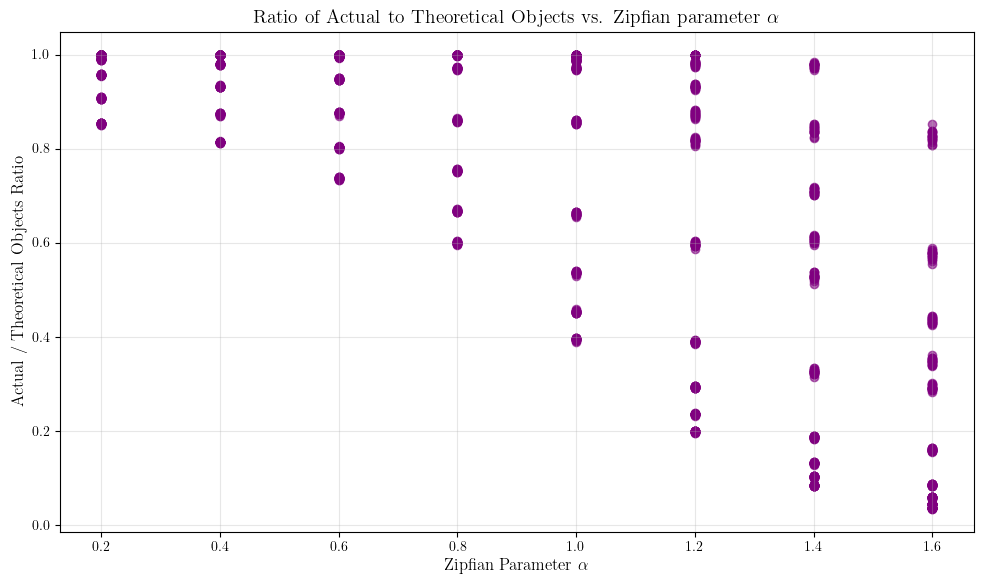

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(workloads_df['alpha'], workloads_df['objects_actual'] / workloads_df['objects_theoretical'], alpha=0.6, color='purple')
plt.xlabel(r'Zipfian Parameter $\alpha$')
plt.ylabel(r'Actual / Theoretical Objects Ratio')
plt.title(r'Ratio of Actual to Theoretical Objects vs. Zipfian parameter $\alpha$')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

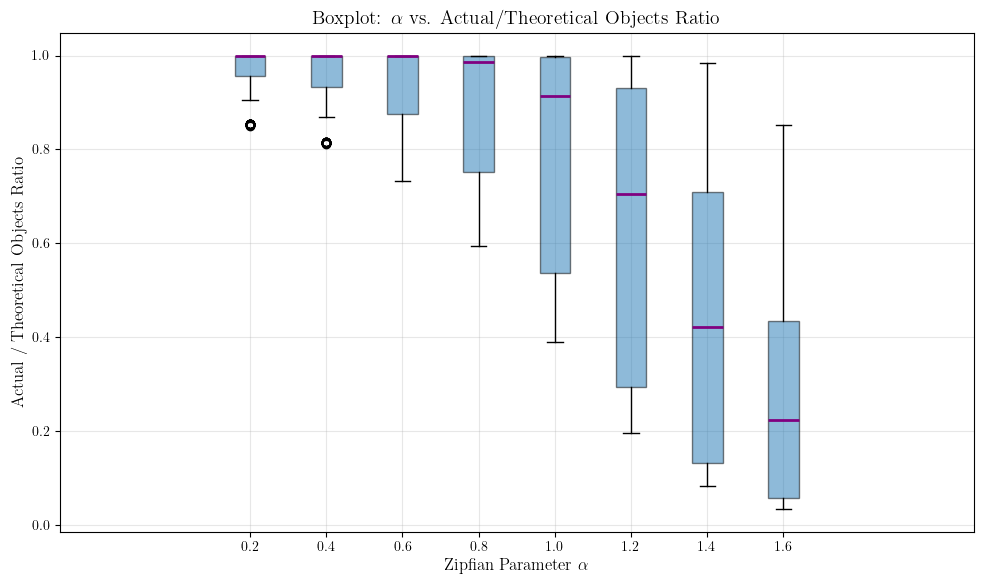

In [6]:
plt.figure(figsize=(10, 6))
plt.boxplot(
    [workloads_df.loc[workloads_df['alpha'] == a, 'objects_actual'] / workloads_df.loc[workloads_df['alpha'] == a, 'objects_theoretical']
    for a in alpha_values],
    positions=alpha_values,
    widths=0.08,
    patch_artist=True,
    boxprops=dict(alpha=0.5),
    medianprops=dict(color='purple', linewidth=2)  # Change median line color to green
)


plt.xlabel(r'Zipfian Parameter $\alpha$')
plt.ylabel(r'Actual / Theoretical Objects Ratio')
plt.title(r'Boxplot: $\alpha$ vs. Actual/Theoretical Objects Ratio')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

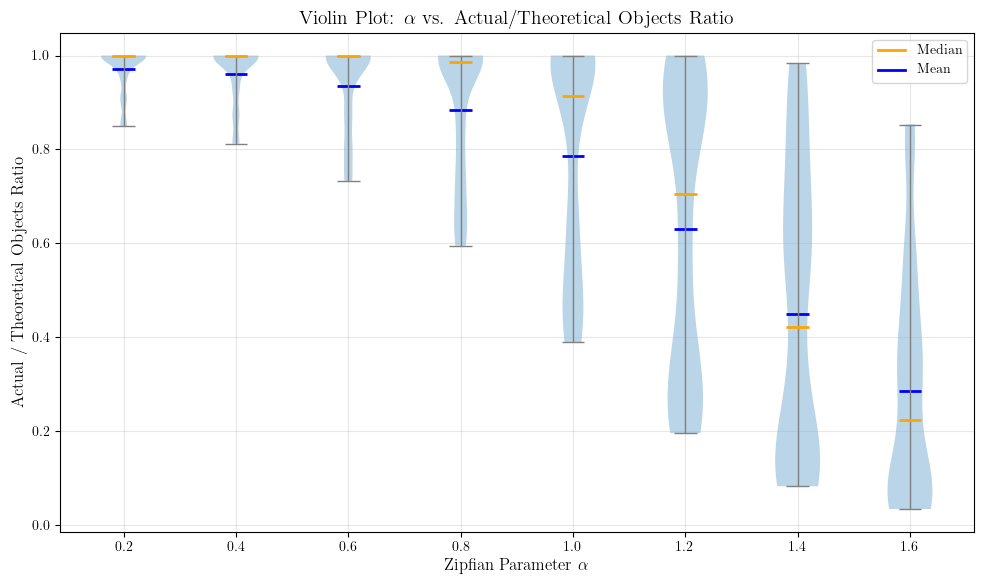

In [40]:
fig = plt.figure(figsize=(10, 6))

violin_parts = plt.violinplot(
    [workloads_df.loc[workloads_df['alpha'] == a, 'objects_actual'] / workloads_df.loc[workloads_df['alpha'] == a, 'objects_theoretical']
    for a in alpha_values],
    positions=alpha_values,
    widths=0.08,
    showmeans=True,
    showmedians=True
)

# Customize colors for mean and median lines
for partname in ('cbars', 'cmins', 'cmaxes'):
    vp = violin_parts[partname]
    vp.set_edgecolor('gray')
    vp.set_linewidth(1)

violin_parts['cmedians'].set_color('orange')
violin_parts['cmedians'].set_linewidth(2)
violin_parts['cmeans'].set_color('blue')
violin_parts['cmeans'].set_linewidth(2)

# Add legend for mean and median
legend_elements = [
    Line2D([0], [0], color='orange', lw=2, label='Median'),
    Line2D([0], [0], color='blue', lw=2, label='Mean')
]
plt.legend(handles=legend_elements)

plt.xlabel(r'Zipfian Parameter $\alpha$')
plt.ylabel(r'Actual / Theoretical Objects Ratio')
plt.title(r'Violin Plot: $\alpha$ vs. Actual/Theoretical Objects Ratio')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

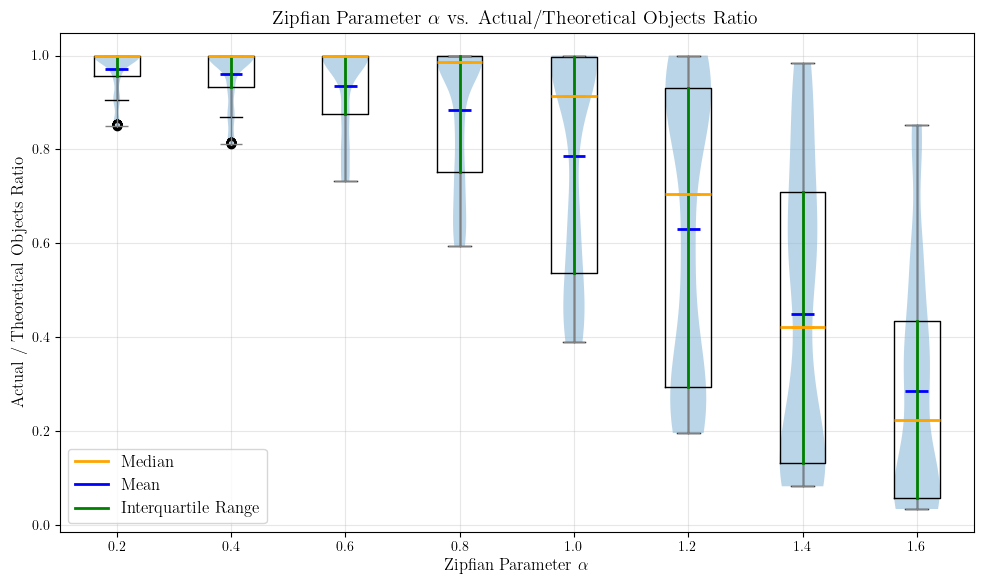

In [10]:
fig = plt.figure(figsize=(10, 6))

# Add boxplot overlapping the violin plot
plt.boxplot(
    [workloads_df.loc[workloads_df['alpha'] == a, 'objects_actual'] / workloads_df.loc[workloads_df['alpha'] == a, 'objects_theoretical']
    for a in alpha_values],
    positions=alpha_values,
    widths=0.08,
    # patch_artist=True,
    # boxprops=dict(facecolor='purple', alpha=0.3),
    medianprops=dict(color='orange', linewidth=2)
)

violin_parts = plt.violinplot(
    [workloads_df.loc[workloads_df['alpha'] == a, 'objects_actual'] / workloads_df.loc[workloads_df['alpha'] == a, 'objects_theoretical']
    for a in alpha_values],
    positions=alpha_values,
    widths=0.08,
    showmeans=True,
    showmedians=True
)

# Customize colors for mean and median lines
for partname in ('cbars', 'cmins', 'cmaxes'):
    vp = violin_parts[partname]
    vp.set_edgecolor('gray')
    vp.set_linewidth(1)

violin_parts['cmedians'].set_color('orange')
violin_parts['cmedians'].set_linewidth(2)
violin_parts['cmeans'].set_color('blue')
violin_parts['cmeans'].set_linewidth(2)

# Calculate quartiles for each alpha value
quartiles = [
    np.percentile(workloads_df.loc[workloads_df['alpha'] == a, 'objects_actual'] / workloads_df.loc[workloads_df['alpha'] == a, 'objects_theoretical'], [25, 75])
    for a in alpha_values
]

# Add upper and lower quartile lines
for idx, (q25, q75) in enumerate(quartiles):
    plt.plot([alpha_values[idx], alpha_values[idx]], [q25, q75], color='green', linewidth=2)

# Add legend for mean and median
legend_elements = [
    Line2D([0], [0], color='orange', lw=2, label='Median'),
    Line2D([0], [0], color='blue', lw=2, label='Mean'),
    Line2D([0], [0], color='green', lw=2, label='Interquartile Range')
]

plt.legend(handles=legend_elements, loc='lower left', fontsize=12)

plt.xlim(0.1, 1.7)
plt.xlabel(r'Zipfian Parameter $\alpha$')
plt.ylabel(r'Actual / Theoretical Objects Ratio')
plt.title(r'Zipfian Parameter $\alpha$ vs. Actual/Theoretical Objects Ratio')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

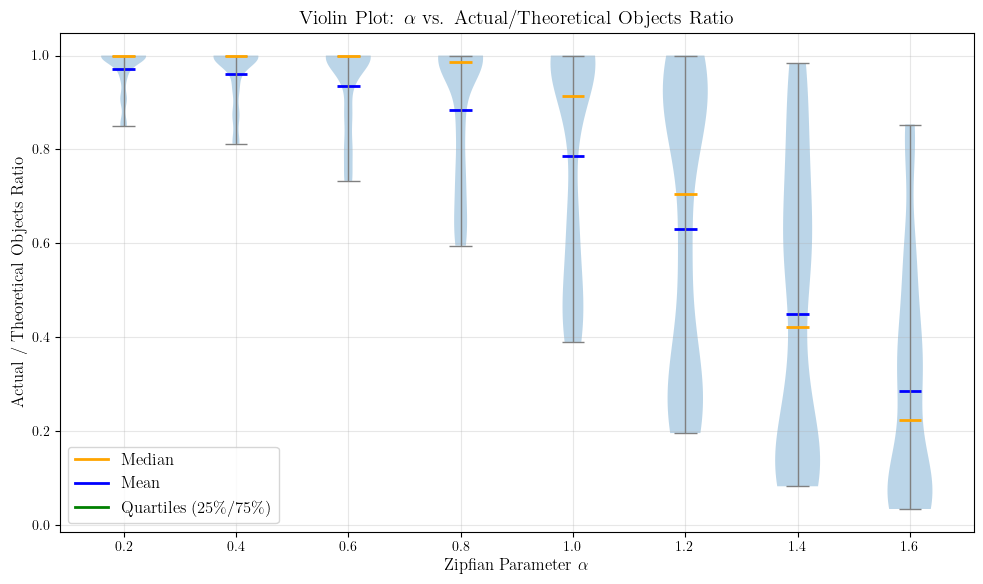

In [7]:
fig = plt.figure(figsize=(10, 6))

violin_parts = plt.violinplot(
    [workloads_df.loc[workloads_df['alpha'] == a, 'objects_actual'] / workloads_df.loc[workloads_df['alpha'] == a, 'objects_theoretical']
    for a in alpha_values],
    positions=alpha_values,
    widths=0.08,
    showmeans=True,
    showmedians=True
)

# Customize colors for mean and median lines
for partname in ('cbars', 'cmins', 'cmaxes'):
    vp = violin_parts[partname]
    vp.set_edgecolor('gray')
    vp.set_linewidth(1)

violin_parts['cmedians'].set_color('orange')
violin_parts['cmedians'].set_linewidth(2)
violin_parts['cmeans'].set_color('blue')
violin_parts['cmeans'].set_linewidth(2)

# Add legend for mean, median, and quartiles
legend_elements = [
    Line2D([0], [0], color='orange', lw=2, label='Median'),
    Line2D([0], [0], color='blue', lw=2, label='Mean'),
    Line2D([0], [0], color='green', lw=2, label='Quartiles (25\%/75\%)')
]
plt.legend(handles=legend_elements, loc='lower left', fontsize=12)

plt.xlabel(r'Zipfian Parameter $\alpha$')
plt.ylabel(r'Actual / Theoretical Objects Ratio')
plt.title(r'Violin Plot: $\alpha$ vs. Actual/Theoretical Objects Ratio')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
